# TCSS 478/588 In-class Exercise: Logistic regression

These exercises will be used to illustrate how to perform data analyses using R.
Alternatively, you can use R or Rstudio. 
I assume you will learn basic R commands on your own.

Credit: The data and ideas behind these exercises and homeworks are from the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.
http://www.maayanlab.net/crowdsourcing/megatask1.php

The overarching goal is to predict adverse drug reactions. But we will take this task step by step. You will learn more about the meanings of these data in future lectures. For illustrative purposes in today’s class, just treat these data as numbers in a matrix.

## 1. Download and read in gene expression data (same as last week)
Download the data “gene_expression_n438x978.txt” from canvas to your computer.  I have removed the first character (#) and an ‘ from the input file to make R happy.

In [21]:
getwd()

[1] "/home/jovyan"

In [22]:
my.data <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
my.data[1:5, 1:6]

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACETAZOLAMIDE,-0.015159099,-0.031470528,-0.004733488,0.02591061,0.0056296773,-0.007325439
IRBESARTAN,-0.026811981,0.012151979,-0.025550148,-0.02401181,-0.0106717396,0.070951154
IPRATROPIUM BROMIDE,0.001017958,-0.008650622,-0.018128698,-0.02079971,-0.0002722781,0.025003360
EFAVIRENZ,-0.004398264,0.055387992,0.004658520,0.01380732,-0.0340697348,0.024005885
THIAMINE,0.001838965,-0.018079188,-0.011855532,-0.03705033,-0.0133954959,-0.001752450


In [23]:
dim (my.data)

[1] 438 978

# 2. NEW: Download and read in the adverse drug reaction (ADR) data which represesent 0/1 responses for each side effect across drugs
Download the dataset "ADRs_HLGT_n438x232.txt" from Canvas and upload to the JupyterHub.

In [24]:
adr.mat <- read.table ("ADRs_HLGT_n438x232.txt", sep="\t", header=T)
dimnames(adr.mat)[[1]] <- adr.mat [, 1]
adr.mat <- adr.mat[, -1]
dim (adr.mat)
adr.mat[1:5, 1:6]

[1] 438 232

,Abdominal.hernias.and.other.abdominal.wall.conditions,Abortions.and.stillbirth,Acid.base.disorders,Administration.site.reactions,Adrenal.gland.disorders,Age.related.factors
,<int>,<int>,<int>,<int>,<int>,<int>
ACETAZOLAMIDE,0,0,1,1,0,0
IRBESARTAN,0,0,0,0,1,0
IPRATROPIUM BROMIDE,0,0,0,0,1,0
EFAVIRENZ,0,0,0,0,1,1
THIAMINE,0,0,0,0,0,0


## 3. Question: how would you explore this adr.mat matrix? This is a binary matrix. 
### How sparse is this matrix? In other words, what is the percentage of 1's?

In [25]:
sum(adr.mat)/(438*232)

[1] 0.2674972

### Approx 27% of the data in adr.mat are 1's

## Are there drugs that are associated with many side effects? Are there drugs that are associated with very few side effects?

In [26]:
# compute row sums in the ADR matrix
num.side.effects.per.drug <- apply (adr.mat, 1, sum) # 1 is for rows
length (num.side.effects.per.drug)

[1] 438

In [27]:
# compute column sums in the ADR matrix
num.drugs.with.adr <- apply (adr.mat, 2, sum) # 2 is for column
length (num.drugs.with.adr)

[1] 232

In [28]:
quantile (num.drugs.with.adr, probs=c(0, 0.1, 0.25, 0.5, 0.75, 0.9, 1))

0%   10%   25%   50%   75%   90%  100% 
  7.0  17.0  32.0  85.0 188.5 262.7 379.0

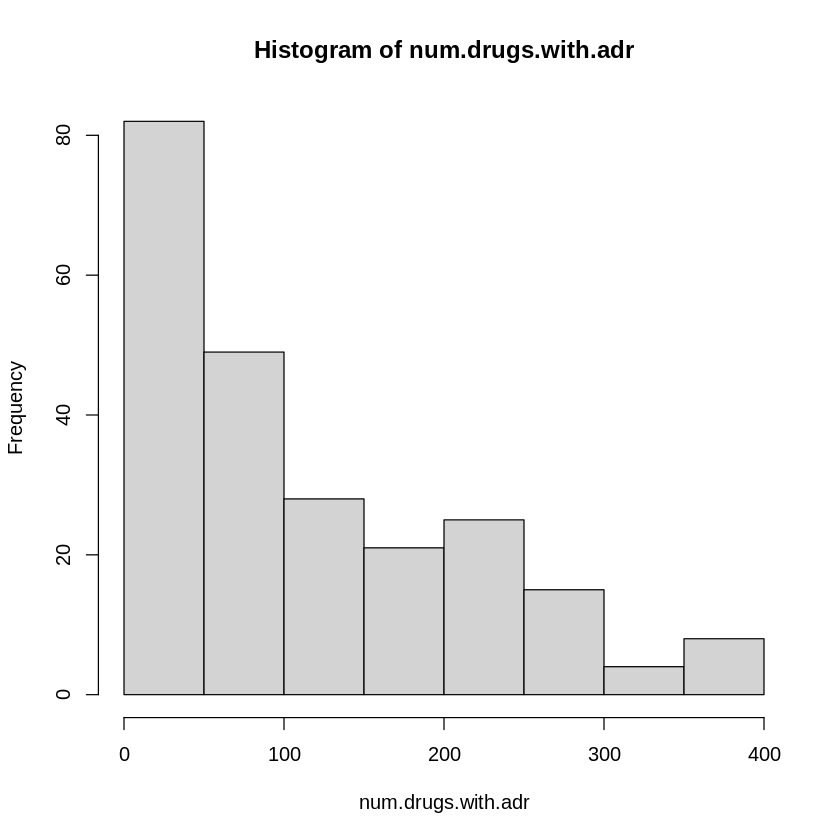

In [29]:
hist (num.drugs.with.adr)

In [30]:
which (num.drugs.with.adr == 379)

Allergic.conditions Angioedema.and.urticaria 
                       7                       12

In [31]:
which (num.drugs.with.adr == 7)

Gastrointestinal.tract.disorders.congenital 
                                         88

# 5. Logistic regression

## Is CDK1 predictive of heart failures?

In [32]:
adr.mat[1:3, 99:102]

,Hearing.disorders,Heart.failures,Hepatobiliary.investigations,Hepatobiliary.neoplasms
,<int>,<int>,<int>,<int>
ACETAZOLAMIDE,0,0,0,0
IRBESARTAN,0,1,1,0
IPRATROPIUM BROMIDE,0,0,0,0


In [38]:
glmFit1 <- glm (adr.mat[,100] ~ my.data$CDK1, family=binomial) # generalized linear model

In [39]:
summary (glmFit1)


Call:
glm(formula = adr.mat[, 100] ~ my.data$CDK1, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.176  -1.161  -1.157   1.193   1.198  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.03821    0.09937  -0.384    0.701
my.data$CDK1 -0.20154    3.27850  -0.061    0.951

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 607.05  on 437  degrees of freedom
Residual deviance: 607.05  on 436  degrees of freedom
AIC: 611.05

Number of Fisher Scoring iterations: 3


In [40]:
ret.pred <- predict (glmFit1, type="response")
length (ret.pred)
ret.pred[1:10]

[1] 438

1         2         3         4         5         6         7         8 
0.4903292 0.4920630 0.4902640 0.4883470 0.4900717 0.4899533 0.4898201 0.4911656 
        9        10 
0.4918459 0.4901618

### Are these predictions any good? Why and why not?

### No good because all the probabilities are around 0.5. We want predicted probabilities to be close to (Y=0) or 1(Y=1).

### "                     "

### Derive the prediction using the regression coefficients without using the "predict" function

In [41]:
# get the regression coefficients
coef (glmFit1)

(Intercept) my.data$CDK1 
 -0.03820503  -0.20154136

In [42]:
# beta_0 hat
coef (glmFit1)[[1]]
# beta_1 hat
coef (glmFit1)[[2]]

[1] -0.03820503

[1] -0.2015414

In [43]:
# x vector is equal to my.data$CDK1
curr.val <- coef (glmFit1)[[1]] + coef (glmFit1)[[2]]*my.data$CDK1

In [44]:
curr.exp <- exp (curr.val)
my.pred <- curr.exp / (1+ curr.exp)

In [46]:
my.pred[1:10] # Is CDK1 predictive of heart failures? nah, its like 50/50. not a good predictor.

[1] 0.4903292 0.4920630 0.4902640 0.4883470 0.4900717 0.4899533 0.4898201
 [8] 0.4911656 0.4918459 0.4901618

# 6. Model selection

### We have learned that CDK1 is not predictive of heart failure. Our next goal is to find which genes are predictive of heart failure.

In [19]:
my.data.sub1 <- data.frame (my.data$UBE2C, my.data$ATF1, my.data$RHOA)
my.data.sub1[1:3,]

,my.data.UBE2C,my.data.ATF1,my.data.RHOA
,<dbl>,<dbl>,<dbl>
1,-0.005222555,-0.031470528,0.0056296773
2,-0.020491565,0.012151979,-0.0106717396
3,-0.024964727,-0.008650622,-0.0002722781
